<a href="https://colab.research.google.com/github/obeabi/Automobile_Data_Set/blob/main/Auto_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Date: 2020-11-21
### Project Name : Automobile Dataest

#### Project Objective: Predict Car Price from 25 given attributes
##### Project Type : Regression

## Step 1: Data Uploading and Cleaning: Data Preprocessing

In [5]:
# import libraries
!pip install category-encoders
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")

Installtion completed successfully!


In [6]:
# Import dataset and peruse first 10 rows
data = pd.read_csv('imports-85.data',header = None,  sep = ',')
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Include column names

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base','length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg','price']

print("The number of columns in my input column_names:" , len(column_names))

The number of columns in my input column_names: 26


In [8]:
# Join column names to dataframe
data.columns = column_names

data.to_csv('x123.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# Check the shape of the dataframe and inspect for missing values

print( data.shape)
print("The number of rows in the dataframe", data.shape[0])
print("The number of columns in the dataframe", data.shape[1])

data.replace('?',np.NAN, inplace= True)


missing_values = data.isnull().sum().sum()

print("The total number of missing values" ,missing_values)


(205, 26)
The number of rows in the dataframe 205
The number of columns in the dataframe 26
The total number of missing values 59


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
# Check data types in order to correct if necessary
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
# Convert price column data to float type
data["price"].astype('float')

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [13]:
# Check for missing values in the price  column
data['price'].isnull().sum()

data.dropna(subset=['price'], axis = 0, inplace= True)

print("Misising values in price column in new dataframe is:", data['price'].isnull().sum())
data.reset_index(drop = True)


Misising values in price column in new dataframe is: 0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [14]:
# lET US CHECK PERCENTAGE OF DATA THAT HAVE MISSING VALUES
no_rows = data.shape[0]
no_cols = data.shape[1]
no_records = np.multiply(no_rows, no_cols)
print("The number of records is: ", no_records)
print("The number of missing values is :",missing_values)
number_records = np.multiply(data.shape[0], data.shape[1])

#percentMissing = (missing_values/number_records)*100
percentMissing = (missing_values/ np.product(data.shape))*100
print("The perecentage of missing values is:", percentMissing)


The number of records is:  5226
The number of missing values is : 59
The perecentage of missing values is: 1.1289705319556067


### Handling Missing Values

In [15]:
# Method 1 : Drop all missing values
df1 = data.copy()

# this drops rows with missing values
df_row_drop= df1.dropna(axis = 0)

# Print shape of dataframe
print(df1.shape)
print(df_row_drop.shape)



(201, 26)
(159, 26)


In [16]:

# this drops columns with missing values
df_col_drop= df1.dropna(axis = 1)

# Print shape of dataframe
print(df1.shape)
print(df_col_drop.shape)
print(df_col_drop.columns)

(201, 26)
(201, 20)
Index(['symboling', 'make', 'fuel-type', 'aspiration', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'compression-ratio', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [17]:
# Method 2: Imputation

df2 = data.copy()

df2.isnull().sum()


symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [18]:
# Ensure proper dataypes
df2[['bore','stroke', 'horsepower','peak-rpm']] = df2[['bore','stroke','horsepower','peak-rpm']].astype('float')
#df2[['bore','stroke']] = df2[['bore','stroke']].astype('float')
#df2['horsepower'] = df2['horsepower'].astype(int, copy = True)
#df2['peak-rpm'] = df2['peak-rpm'].astype(int,copy = True)
df2['normalized-losses'] = df2['normalized-losses'].astype('float')
df2['price'] = df2['price'].astype('int')
df2.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [19]:
# Get numerical columns and categorical columns from dataframe
num_cols = df2.select_dtypes(include = ['float','int']).columns
category_cols = [col  for col in df2.columns if df2[col].dtype == "object"]
category_cols

print(category_cols)
print('-'*50)
print(num_cols)


['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
--------------------------------------------------
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [20]:
# Handle/fill the missing values in the  numerical columns
for col in num_cols:
    df2[col].fillna(df2[col].mean(), inplace = True)


df2[num_cols].isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
# Handle/fill the missing values in the  categorical columns

for col in category_cols:
    df2[col].fillna(df2[col].mode()[0], inplace = True)

df2[category_cols].isnull().sum()

# Confirm total missing values in dataframe
print("The total missing vaues in new dataframe is :" , df2.isnull().sum().sum())

The total missing vaues in new dataframe is : 0


In [24]:
# Craeate category for horsepwer 
bins = np.linspace(min(df2["horsepower"]), max(df2["horsepower"]),4)



group_names = ['Low', 'Medium', 'High']

df2['horsepower-binned'] = pd.cut(df2['horsepower'], bins, labels = group_names, include_lowest= True)

df2[['horsepower-binned', 'horsepower']].head()

,horsepower-binned,horsepower
0,Low,111.0
1,Low,111.0
2,Medium,154.0
3,Low,102.0
4,Low,115.0


In [25]:
df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


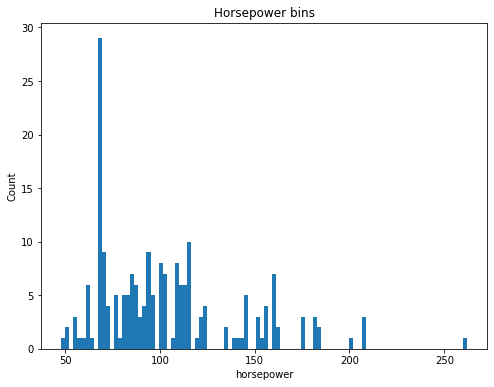

In [26]:
# Plot histogram for horsepower

plt.hist(df2['horsepower'], bins = 100)

plt.xlabel('horsepower')
plt.ylabel('Count')
plt.title('Horsepower bins')
plt.show()

In [33]:
for col in df2[num_cols].columns:
    print(col)
    print("skewness:", df2[col].skew())
    print("kurtosis:", df2[col].kurtosis())
    print('-'*35)

symboling
skewness: 0.19737036029756264
kurtosis: -0.7071776171630866
-----------------------------------
normalized-losses
skewness: 0.8465463512727495
kurtosis: 1.319067556644609
-----------------------------------
wheel-base
skewness: 1.0312614426719533
kurtosis: 0.948445096054463
-----------------------------------
length
skewness: 0.15444635183586677
kurtosis: -0.06519162777008303
-----------------------------------
width
skewness: 0.8750290419412816
kurtosis: 0.6786551692228984
-----------------------------------
height
skewness: 0.029173299149270183
kurtosis: -0.4329081504305292
-----------------------------------
curb-weight
skewness: 0.7058035875297635
kurtosis: 0.034915576048686336
-----------------------------------
engine-size
skewness: 1.9791441966363523
kurtosis: 5.497490766643349
-----------------------------------
bore
skewness: -0.032946155593633106
kurtosis: -0.7981824583683212
-----------------------------------
stroke
skewness: -0.7006789884680729
kurtosis: 2.130131

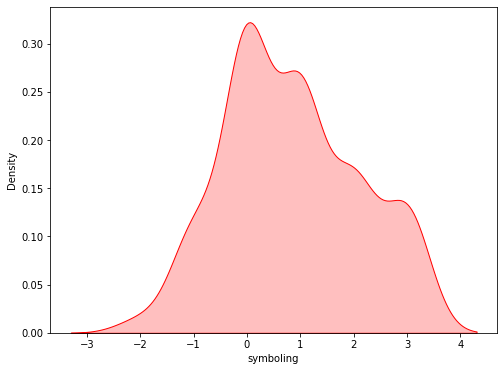

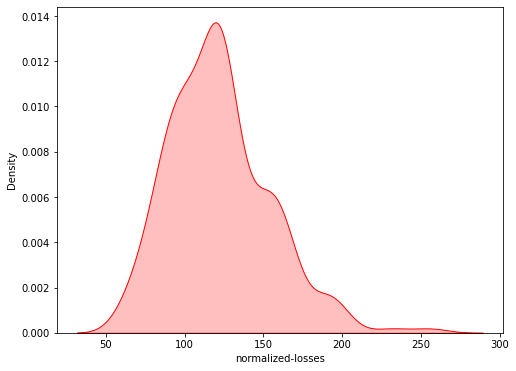

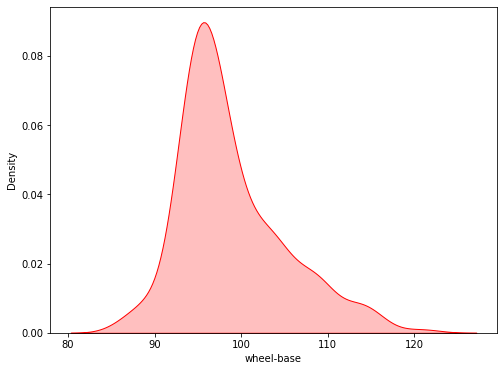

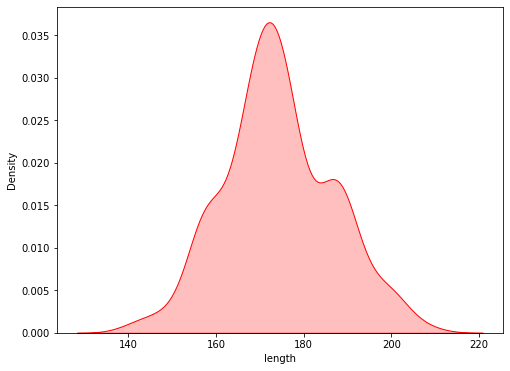

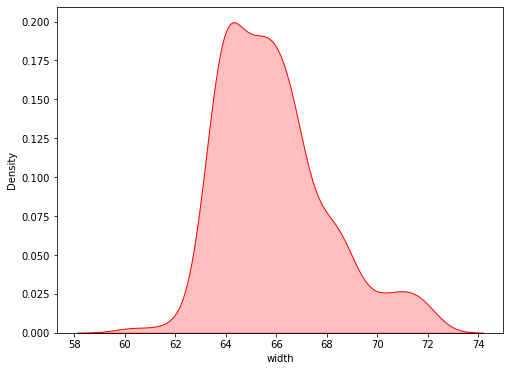

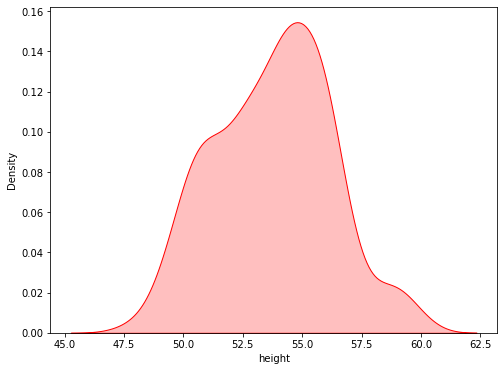

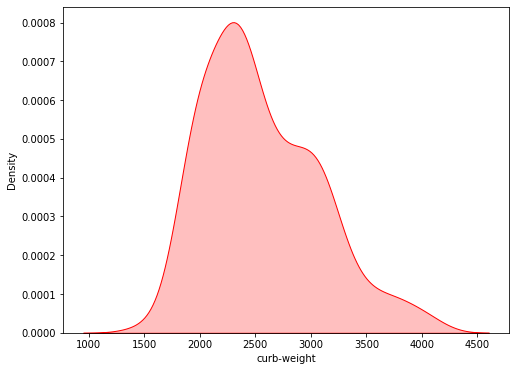

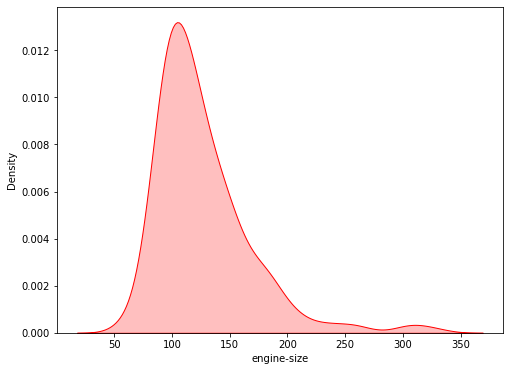

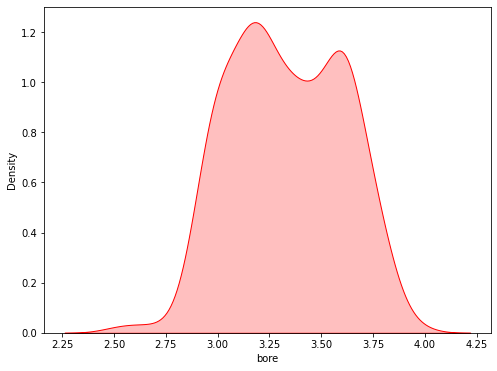

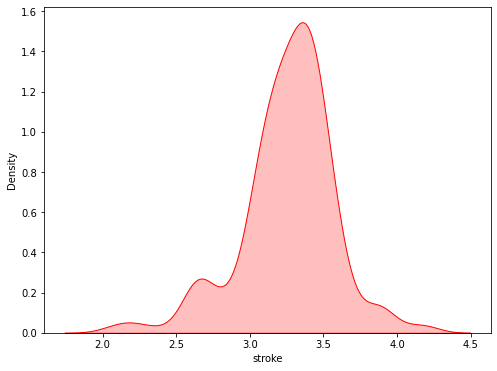

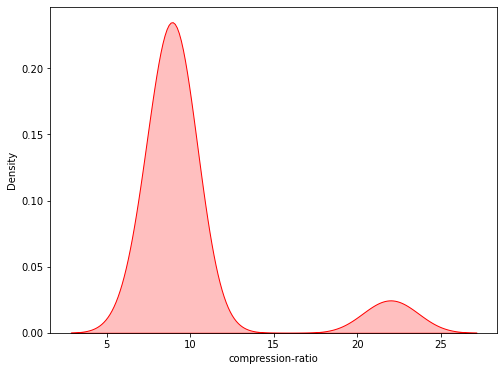

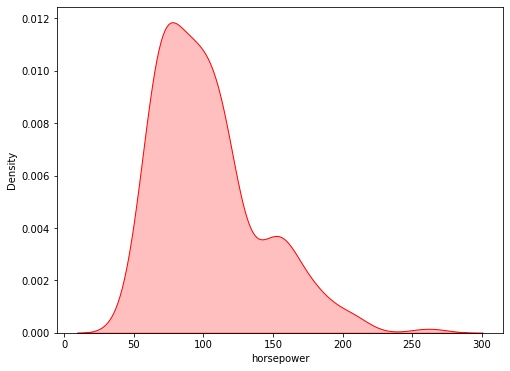

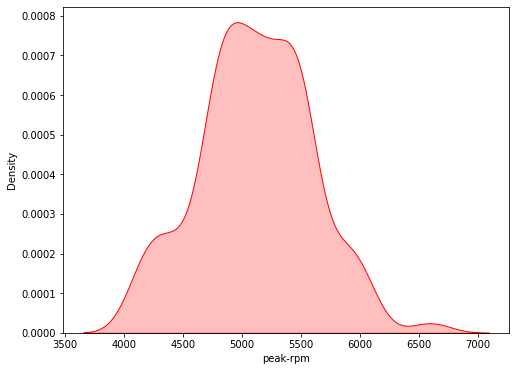

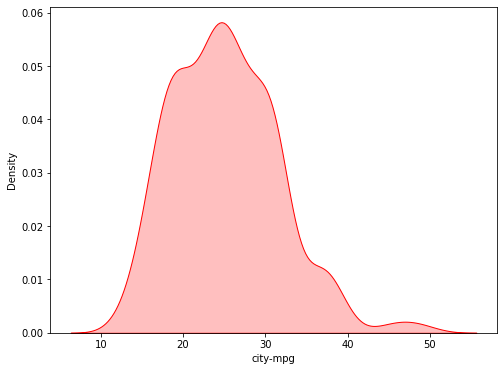

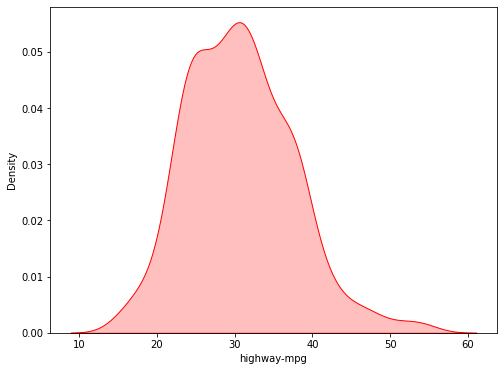

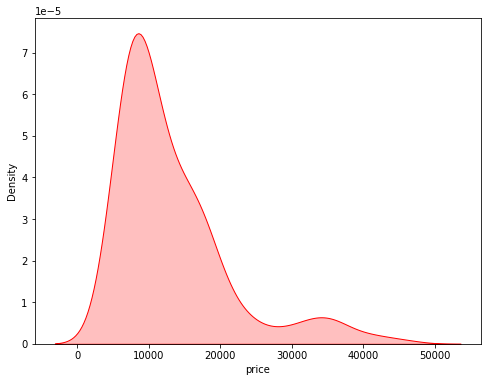

In [61]:
for col in df2[num_cols].columns:
    plt.figure(figsize= (8,6))
    ax = sns.kdeplot(df2[col], shade=True, color="r")
    plt.show()


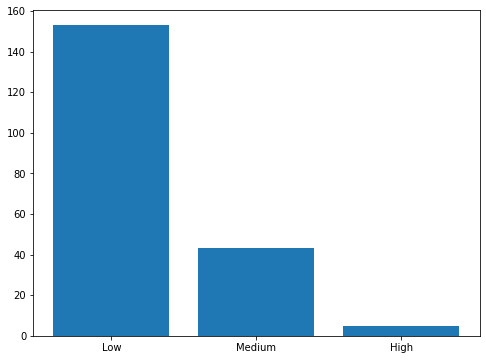

In [35]:
# plot barchart for horsepower-binned column
plt.bar(group_names, df2['horsepower-binned'].value_counts())
plt.show()




In [ ]:
# Print dataframe
df2.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


## Step 2: EDA

In [ ]:
# Summarize basic statistics of the dataframe
df2.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


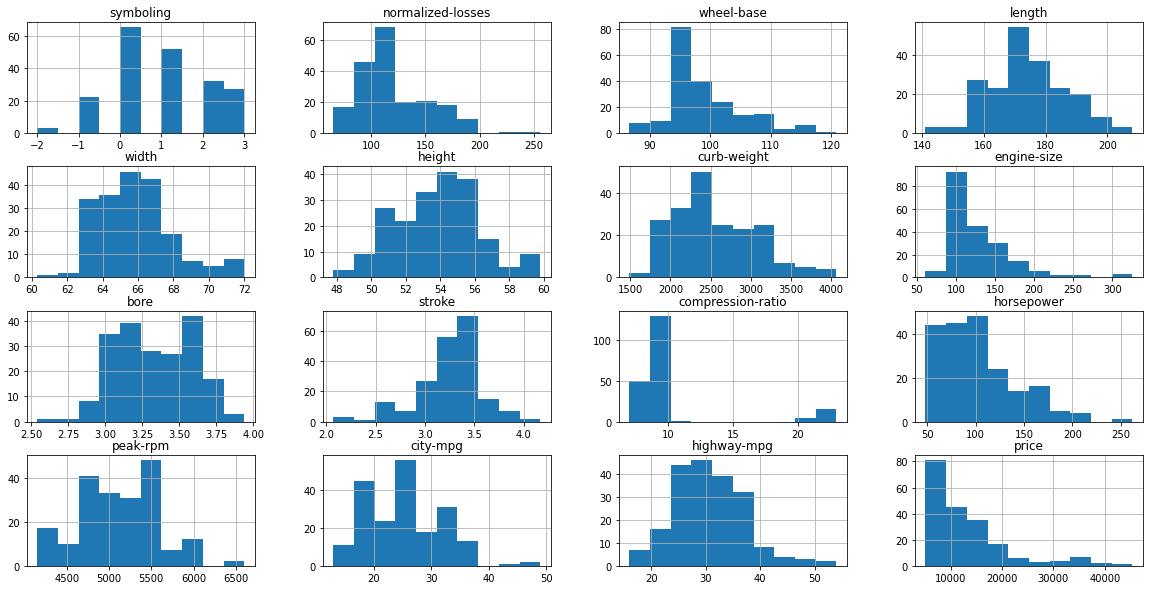

In [ ]:
# Visualize histogram of dataset
df2.hist(figsize= (20,10), bins= 10)
plt.show()

In [40]:
# Explore vechile by drive-wheels

drive_wheels_counts = df2['drive-wheels'].value_counts().to_frame()
#drive_wheels_counts = df2['drive-wheels'].value_counts()

drive_wheels_counts.rename(columns= {"drive-wheels":'Value-counts'}, inplace= True)

drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts


,Value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


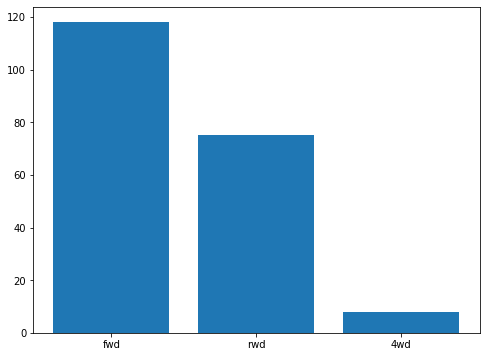

In [41]:
# plot barchart for vechile drive-wheels
group_names = [ 'fwd', 'rwd', '4wd']
plt.bar(group_names, df2['drive-wheels'].value_counts())
plt.show()

In [43]:
# Explore vechile by engine-type

engine_type_counts = df2['engine-type'].value_counts().to_frame()

engine_type_counts.rename(columns= {"engine-type":'Value-counts'}, inplace= True)

engine_type_counts.index.name = 'engine-type'

engine_type_counts

,Value-counts
engine-type,
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


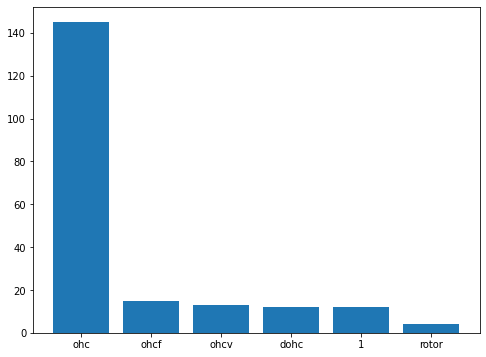

In [44]:
# plot barchart for vechile engine-types
group_names = [ 'ohc', 'ohcf', 'ohcv', 'dohc', '1','rotor']
plt.bar(group_names, df2['engine-type'].value_counts())
plt.show()

In [45]:
# Explore vechile by number of cylinders

num_cylinders_counts = df2['num-of-cylinders'].value_counts().to_frame()

num_cylinders_counts.index.name = 'cylinders'

num_cylinders_counts

,num-of-cylinders
cylinders,
four,157
six,24
five,10
eight,4
two,4
twelve,1
three,1


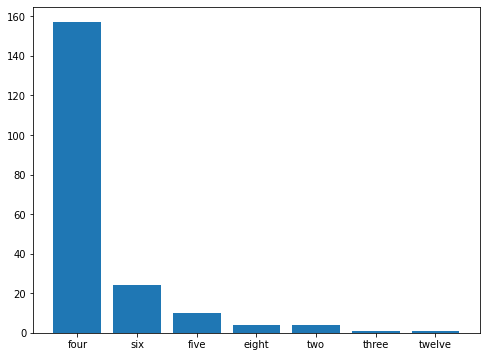

In [46]:
# plot barchart for vechile number of cylinders
group_names = [ 'four', 'six', 'five', 'eight', 'two','three', 'twelve']
plt.bar(group_names, df2['num-of-cylinders'].value_counts())
plt.show()

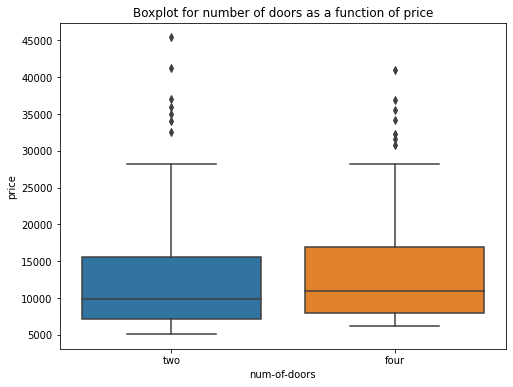

In [47]:
# Boxplot for number of doors

sns.boxplot(x = "num-of-doors", y = 'price', data = df2)
plt.title("Boxplot for number of doors as a function of price")
plt.show()

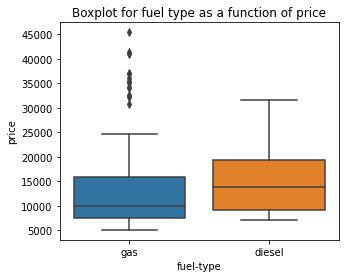

In [ ]:
# Boxplot for fuel type

sns.boxplot(x = "fuel-type", y = 'price', data = df2)
plt.title("Boxplot for fuel type as a function of price")
plt.show()

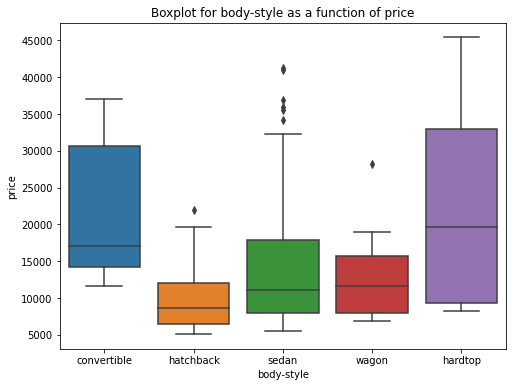

In [48]:
# Boxplot for body-style

sns.boxplot(x = "body-style", y = 'price', data = df2)
plt.title("Boxplot for body-style as a function of price")
plt.show()

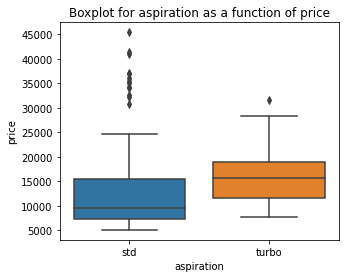

In [ ]:
# Boxplot for aspiration

sns.boxplot(x = "aspiration", y = 'price', data = df2)
plt.title("Boxplot for aspiration as a function of price")
plt.show()

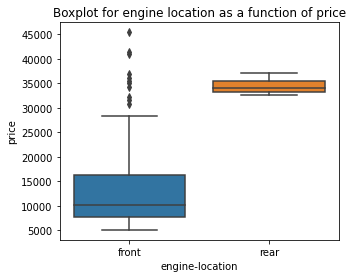

In [ ]:
# Boxplot for engine location

sns.boxplot(x = "engine-location", y = 'price', data = df2)
plt.title("Boxplot for engine location as a function of price")
plt.show()

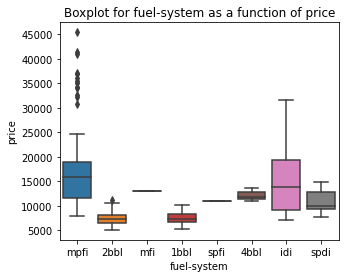

In [ ]:
# Boxplot for fuel system

sns.boxplot(x = "fuel-system", y = 'price', data = df2)
plt.title("Boxplot for fuel-system as a function of price")
plt.show()

In [50]:
# Average price of vechiles by drive-wheels

df_test= df2.groupby(['drive-wheels'], as_index= False)['price'].mean()
df_test.sort_values(by = ['price'])

,drive-wheels,price
1,fwd,9244.779661
0,4wd,10241.000000
2,rwd,19757.613333


In [54]:
# Average price of vechiles by drive-wheels and aspiration
#df_test = df2[['drive-wheels', 'aspiration', 'price']]
df_test= df2.groupby(['drive-wheels','aspiration'], as_index= False)['price'].median()
df_test.sort_values(by = ['price'])

,drive-wheels,aspiration,price
2,fwd,std,7896.5
0,4wd,std,8395.5
1,4wd,turbo,11476.5
3,fwd,turbo,11663.5
4,rwd,std,16515.0
5,rwd,turbo,18685.0


In [55]:
# Check for correlation between variables
df2.corr(method = 'spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.178442,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.021328,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.536986,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639137,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.607031,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.221354,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702222,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.696128,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.178442,-0.021328,0.536986,0.639137,0.607031,0.221354,0.702222,0.696128,1.000000,-0.084952,-0.168194,0.640812,-0.304192,-0.608772,-0.620782,0.646417
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084952,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


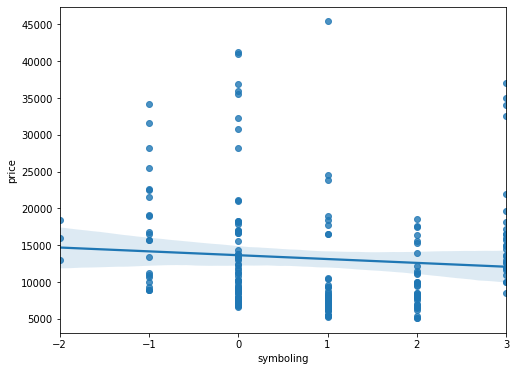

In [56]:
# regression plot of symboling
sns.regplot(x = 'symboling', y = 'price', data = df2)
plt.show()

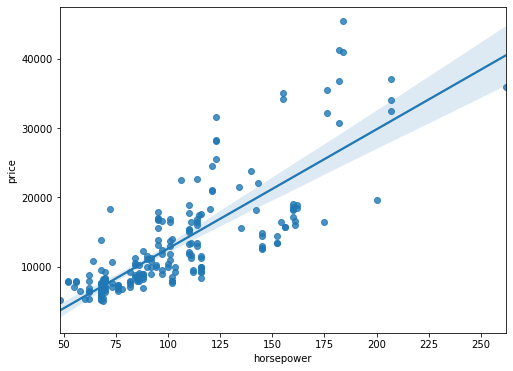

In [57]:
# regression plot of horsepower
sns.regplot(x = 'horsepower', y = 'price', data = df2)
plt.show()

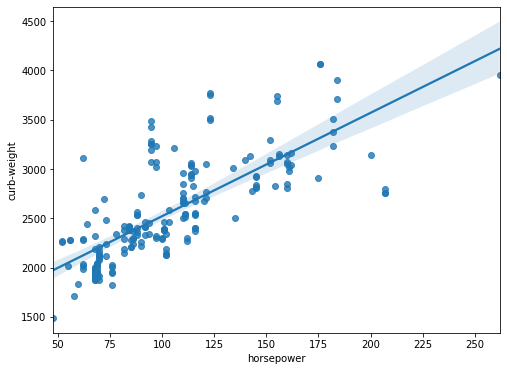

In [58]:
# regression plot of horsepower
sns.regplot(x = 'horsepower', y = 'curb-weight', data = df2)
plt.show()

## Feature Engineering

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality = [cname for cname in df2.columns if
                    df2[cname].nunique() < 5 and
                    df2[cname].dtype == "object"]
low_cardinality

['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location']

In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
high_cardinality = [cname for cname in df2.columns if
                    df2[cname].nunique() > 5 and
                    df2[cname].dtype == "object"]
high_cardinality

['make', 'engine-type', 'num-of-cylinders', 'fuel-system']

In [ ]:
# Let's check one hot encoding all category columns

df2_a = df2.copy()

df2_a = pd.get_dummies(df2_a, columns=category_cols)

print(df2_a.shape)
df2_a.head()

# A total of 75 rows this is too much

(201, 76)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# One-hot encode the make column of dataframe and concat/join to orginal dataframe

df_oh =df2.copy()

for cols in category_cols:
  encoded = pd.get_dummies(df_oh[cols], prefix= cols )
  df_oh = pd.concat([df_oh, encoded], axis=1)

print(df_oh.shape)
df_oh.head()

# With the columns with high dimensionality only we have 104 columns in total (This is too much)

(201, 86)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df2.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


In [ ]:
# Count Encoding of Categorical Variables
#Create the  Count encoder object
df2_ce = df2.copy()
count_enc = ce.CountEncoder()

# Apply the count encoder to dataframe
df2_ce[category_cols ] = count_enc.fit_transform(df2_ce[category_cols])
df2_ce.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,3,181,165,86,68,75,198,94.5,171.2,65.5,52.4,2823,13,24,152,92,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,6,181,165,115,94,118,198,99.8,176.6,66.2,54.3,2337,145,157,109,92,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,6,181,165,115,94,8,198,99.4,176.6,66.4,54.3,2824,145,10,136,92,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low
5,2,122.0,6,181,165,86,94,118,198,99.8,177.3,66.3,53.1,2507,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,15250,Low
6,1,158.0,6,181,165,115,94,118,198,105.8,192.7,71.4,55.7,2844,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,17710,Low
7,1,122.0,6,181,165,115,25,118,198,105.8,192.7,71.4,55.7,2954,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25,18920,Low
8,1,158.0,6,181,36,115,94,118,198,105.8,192.7,71.4,55.9,3086,145,10,131,92,3.13,3.40,8.3,140.0,5500.0,17,20,23875,Medium
10,2,192.0,8,181,165,86,94,75,198,101.2,176.8,64.8,54.3,2395,145,157,108,92,3.50,2.80,8.8,101.0,5800.0,23,29,16430,Low


In [ ]:
df2_ce.shape
df2_ce.to_csv('CountClean.csv')

In [ ]:
#  Method 2 : lABEL Encoder
df_le = df2.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le[category_cols]= df_le[category_cols].apply(le.fit_transform)

df_le.to_csv('LableClean.csv')
df_le.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495,Low
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500,Low
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500,Medium
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950,Low
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450,Low


In [ ]:
# drop horsepower-binned column from dataframe
df2_ce.drop(columns = ['horsepower-binned'], inplace= True)

df2_ce.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,3,181,165,86,68,75,198,94.5,171.2,65.5,52.4,2823,13,24,152,92,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,6,181,165,115,94,118,198,99.8,176.6,66.2,54.3,2337,145,157,109,92,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,6,181,165,115,94,8,198,99.4,176.6,66.4,54.3,2824,145,10,136,92,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [ ]:
# Check for outliers
zscore = np.abs(stats.zscore(df2_ce))
zscore


array([[1.72504964, 0.        , 1.30462196, ..., 0.65224901, 0.54228772,
        0.03631396],
       [1.72504964, 0.        , 1.30462196, ..., 0.65224901, 0.54228772,
        0.41538505],
       [0.1271926 , 0.        , 1.30462196, ..., 0.96439676, 0.689386  ,
        0.41538505],
       ...,
       [1.47066444, 0.84595589, 0.38613154, ..., 1.12047063, 1.13068086,
        1.04422678],
       [1.47066444, 0.84595589, 0.38613154, ..., 0.12812034, 0.54228772,
        1.16848137],
       [1.47066444, 0.84595589, 0.38613154, ..., 0.96439676, 0.83648429,
        1.18803412]])

In [ ]:
## For simplicity remove all data with outliers
df = df2_ce
df = df[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", df2_ce.shape)
print("The shape of the clean dataframe is :", df.shape)

deleted_entries = df2_ce.shape[0] - df.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (201, 26)
The shape of the clean dataframe is : (155, 26)
Entries deleted in the dataframe are : 46


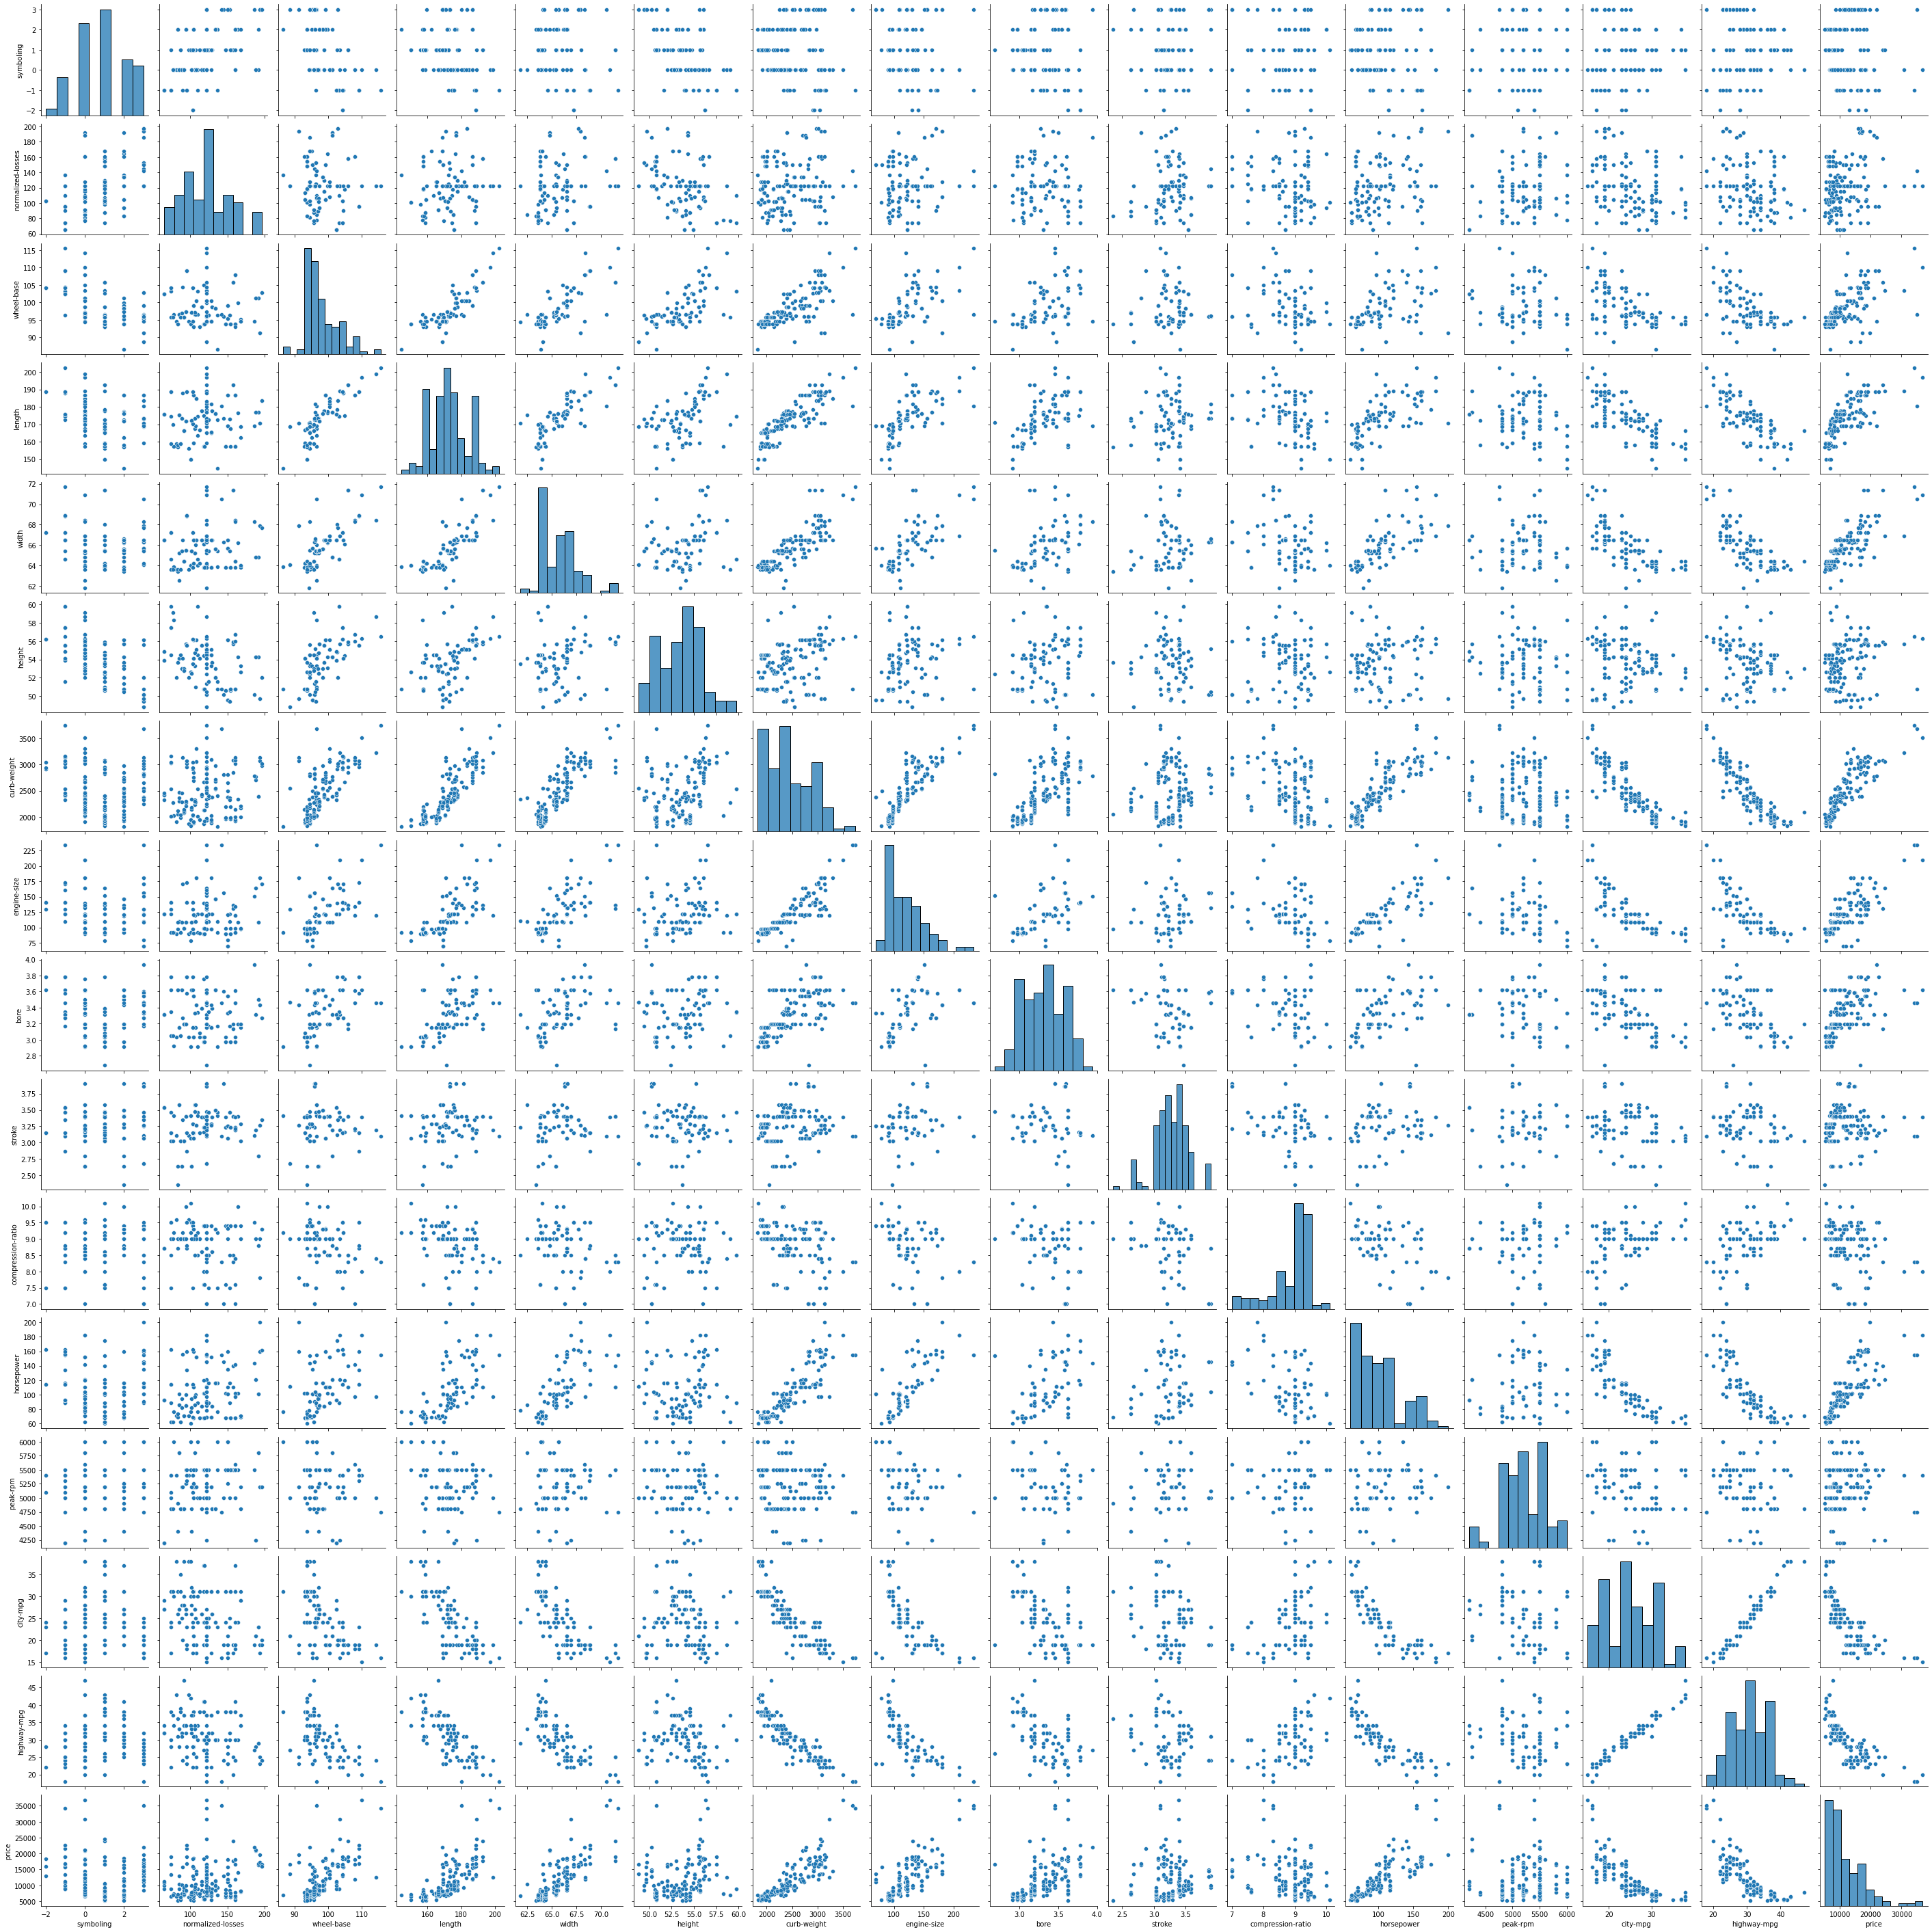

In [ ]:
# pairplot on numerical variables
sns.pairplot(df[num_cols])
plt.show()

### Feature Selection

In [ ]:
# Split dataframe into X and y
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(y.shape[0]))


(155, 25)
(155,)
The total number of rows in the feature X dataset is 155
The total number of attributes in X is 25
The total number of observations in y is 155


In [ ]:
# Visualize X
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,3,181,165,86,6,75,198,88.6,168.8,64.1,48.8,2548,12,157,130,92,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,3,181,165,86,68,75,198,94.5,171.2,65.5,52.4,2823,13,24,152,92,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,6,181,165,115,94,118,198,99.8,176.6,66.2,54.3,2337,145,157,109,92,3.19,3.40,10.0,102.0,5500.0,24,30
5,2,122.0,6,181,165,86,94,118,198,99.8,177.3,66.3,53.1,2507,145,10,136,92,3.19,3.40,8.5,110.0,5500.0,19,25


In [ ]:
# Visualize y
y.head()

0    13495
1    16500
2    16500
3    13950
5    15250
Name: price, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127, 25)
(28, 25)
(127,)
(28,)


In [ ]:
# Feature Selection to slect top best 8 attributes
from sklearn.feature_selection import SelectKBest,f_regression
# Keep 8 features
selector_fclass = SelectKBest(f_regression, 8)
Xtrain_new = selector_fclass.fit_transform(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


array([[ 94.5, 168.7,  64. , ...,  70. ,  29. ,  34. ],
       [ 93.1, 166.8,  64.2, ...,  68. ,  31. ,  38. ],
       [ 99.1, 186.6,  66.5, ..., 160. ,  19. ,  26. ],
       ...,
       [ 94.5, 165.3,  63.8, ...,  69. ,  31. ,  37. ],
       [ 97.3, 171.7,  65.5, ...,  85. ,  27. ,  34. ],
       [ 96.5, 169.1,  66. , ..., 100. ,  25. ,  31. ]])

In [ ]:
#Get back the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=X_train.index,
                                 columns=X.columns)
selected_features_fclass.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.5,168.7,64.0,0.0,2169.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,70.0,0.0,29.0,34.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.1,166.8,64.2,0.0,1950.0,0.0,0.0,91.0,0.0,0.0,0.0,0.0,68.0,0.0,31.0,38.0
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.1,186.6,66.5,0.0,2847.0,0.0,0.0,121.0,0.0,0.0,0.0,0.0,160.0,0.0,19.0,26.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.1,188.8,68.9,0.0,2952.0,0.0,0.0,141.0,0.0,0.0,0.0,0.0,114.0,0.0,23.0,28.0
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.9,173.2,66.3,0.0,2926.0,0.0,0.0,156.0,0.0,0.0,0.0,0.0,145.0,0.0,19.0,24.0


In [ ]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns
# Get the validation dataset with the selected features.
X_test[selected_columns].head()

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
156,95.7,166.3,64.4,2081,98,70.0,30,37
94,94.5,165.3,63.8,1951,97,69.0,31,37
61,98.8,177.8,66.5,2385,122,84.0,26,32
36,96.5,157.1,63.9,2024,92,76.0,30,34
40,96.5,175.4,62.5,2372,110,86.0,27,33


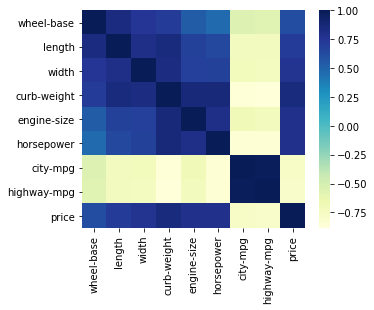

In [ ]:
# Examine correlation matrix
corr_matrix = df[['wheel-base', 'length','width','curb-weight', 'engine-size','horsepower','city-mpg', 'highway-mpg','price']].corr()


ax = sns.heatmap(corr_matrix,  cmap = 'YlGnBu')

In [ ]:
# Correlation analysis using pearson correlation

out_list = []
for column in X_train[selected_columns].columns:
  corr_tuple = scipy.stats.pearsonr(X_train[column], y_train)
  out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [ ]:
# create dataframe based on correlations
corr_df = pd.DataFrame(out_list, columns= ["Features", "Correlation","Pvalues"])

corr_df

,Features,Correlation,Pvalues
0,wheel-base,0.615672,1.329872e-14
1,length,0.729298,2.422727e-22
2,width,0.750449,3.118511e-24
3,curb-weight,0.843032,1.817020e-35
4,engine-size,0.752187,2.138982e-24
5,horsepower,0.792405,1.310518e-28
6,city-mpg,-0.776769,7.231598e-27
7,highway-mpg,-0.786529,6.153449e-28


In [ ]:
# Let's sort varaibles based on p-values
corr_df.sort_values(by = ['Pvalues'], inplace= True)
corr_df.reset_index(drop = True)

corr_df.head(9)

,Features,Correlation,Pvalues
3,curb-weight,0.843032,1.817020e-35
5,horsepower,0.792405,1.310518e-28
7,highway-mpg,-0.786529,6.153449e-28
6,city-mpg,-0.776769,7.231598e-27
4,engine-size,0.752187,2.138982e-24
2,width,0.750449,3.118511e-24
1,length,0.729298,2.422727e-22
0,wheel-base,0.615672,1.329872e-14


### Model : Multiple Linear Regression

In [ ]:
# ReSplit dataframe into X and y
X = df[selected_columns].values
y = df.iloc[:, -1].values
y = y.reshape(len(y),1)
print(X.shape)
print(y.shape)
print("The total number of rows in the feature X dataset is" + " " +  str(X.shape[0]))
print("The total number of attributes in X is" + " " +  str(X.shape[1]))
print("The total number of observations in y is" + " " + str(y.shape[0]))



(155, 8)
(155, 1)
The total number of rows in the feature X dataset is 155
The total number of attributes in X is 8
The total number of observations in y is 155


In [ ]:
 #Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(131, 8)
(24, 8)
(131, 1)
(24, 1)


In [ ]:
# Build MLR model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Coefficients:' , regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficients: [[ 202.9280464   -45.44490684  546.91171852    2.11809106   30.03601217
    35.31082917 -401.612781    205.38829091]]
Intercept: [-45066.13160421]


In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7391.73  6938.  ]
 [ 6123.2   7299.  ]
 [11085.33 10595.  ]
 [ 6993.46  7295.  ]
 [ 8026.44 10295.  ]
 [ 5164.18  5195.  ]
 [25290.93 36880.  ]
 [ 8920.63  7775.  ]
 [11170.05 11245.  ]
 [15213.9  12940.  ]
 [18037.48 18420.  ]
 [ 6082.68  7999.  ]
 [ 9268.18  7957.  ]
 [19088.48 18150.  ]
 [16595.28 16630.  ]
 [18192.92 17710.  ]
 [ 6866.35  8238.  ]
 [ 4466.35  6575.  ]
 [ 9268.18  7957.  ]
 [ 6658.58  7129.  ]
 [22478.23 35056.  ]
 [ 9526.56 11595.  ]
 [ 9792.46  7975.  ]
 [12764.92  9295.  ]]


In [ ]:
# Evaluate MLR model for training set
y_hat = regressor.predict(X_train)
print("Residual sum of square for training set: %.2f " % np.mean((y_train -y_hat)**2))
print("Variance score for training set: %.2f" % regressor.score(X_train, y_train))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_train,y_hat))

Residual sum of square for training set: 6783367.96 
Variance score for training set: 0.76
R2- score for test set: 0.76


In [ ]:
# Evaluate MLR model for test set

print("Residual sum of square for test set: %.2f " % np.mean((y_pred -y_test)**2))
print("Variance score for test set: %.2f" % regressor.score(X_test, y_test))

from sklearn.metrics import r2_score
print("R2- score for test set: %.2f" % r2_score(y_test,y_pred))

Residual sum of square for test set: 14191908.83 
Variance score for test set: 0.78
R2- score for test set: 0.78
